# <center>Chess Puzzle Rating Estimation</center>

## Dataset

### Descriptions

| **Field Name** | **Field Description** | **Field Type** | **Example Value** |
|----------------|-----------------------|----------------|-------------------|
| PuzzleId       | Unique puzzle ID       | string         | 00sHx             |
| FEN            | Board position in standard notation | string         | `q3k1nr/1pp1nQpp/3p4/1P2p3/4P3/B1PP1b2/B5PP/5K2 b k - 0 17` |
| Moves          | Solution to the puzzle in PGN | string         | `e8d7 a2e6 d7d8 f7f8` |
| Rating         | Puzzle rating          | int            | 1760              |
| RatingDeviation    | Measure of uncertainty over difficulty | int            | 85                |
| Popularity         | Difference between upvotes and downvotes | int            | 10                |
| NbPlays            | Number of attempts at solving the puzzle | int            | 350               |
| Themes             | Puzzle themes                        | string         | mates in 2 moves  |
| GameUrl            | Puzzle source link                   | string         | https://lichess.org/game1 |
| OpeningTags        | Opening from which the puzzle originated | string         | Sicilian Defense  |

### FEN explained

The FEN (Forsyth-Edwards Notation) is a standard notation for describing the position of pieces on a chessboard. Each FEN string consists of six space-separated fields that fully describe the current game state.

#### FEN Format:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


##### 1. Piece Placement (Field 1)
This is the first section of the FEN string and describes the positions of all pieces on the board, starting from the 8th rank (black’s back rank) down to the 1st rank (white’s back rank).

- **Letters** represent pieces:
  - Uppercase for white pieces (`R` for rook, `N` for knight, `B` for bishop, `Q` for queen, `K` for king, `P` for pawn).
  - Lowercase for black pieces (`r`, `n`, `b`, `q`, `k`, `p`).
- **Numbers** represent empty squares:
  - For example, `8` means the entire row is empty, while `3` means three empty squares.
  
Example:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR

This represents the standard starting position of a chess game.

##### 2. Active Color (Field 2)
This indicates which player’s turn it is to move:
- **`w`** for white to move.
- **`b`** for black to move.

Example:
w

It is white's turn to move.

##### 3. Castling Availability (Field 3)
This section shows which players still have the right to castle (kingside or queenside).
- **`K`**: White can castle kingside.
- **`Q`**: White can castle queenside.
- **`k`**: Black can castle kingside.
- **`q`**: Black can castle queenside.
- **`-`**: Neither side can castle.

Example:
KQkq

Both players can still castle kingside and queenside.

##### 4. En Passant Target Square (Field 4)
If the last move was a two-square pawn advance, this field will indicate the square where an en passant capture is possible. If no en passant capture is possible, this field will contain `-`.

Example:
e3

White has just moved a pawn two squares forward, allowing black to capture en passant on e3.

##### 5. Halfmove Clock (Field 5)
This counts the number of halfmoves (ply) since the last capture or pawn move. This is used to track the 50-move rule, which can result in a draw if no pawn move or capture has been made in the last 50 moves.

Example:
0

There has been a recent capture or pawn move.

##### 6. Fullmove Number (Field 6)
This indicates the number of full moves in the game. It starts at 1 and increments after each black move.

Example:
1

This is the first move of the game.

---

##### Example FEN Breakdown:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


- **Piece Placement**: `rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR` shows the pieces in their starting positions.
- **Active Color**: `w` indicates it is white’s move.
- **Castling Availability**: `KQkq` means both players can still castle both kingside and queenside.
- **En Passant Target Square**: `-` means no en passant capture is possible.
- **Halfmove Clock**: `0` indicates no moves have been made that would reset the clock (like pawn moves or captures).
- **Fullmove Number**: `1` indicates it is the first move of the game.

This structure fully encapsulates the current state of a chess game in a compact format.



## Approach Overview

### 1. **Flattening the Chess Board**

This approach involves transforming the chess board's position, represented in FEN (Forsyth-Edwards Notation), into a flattened feature vector. Each square on the board is treated as an individual feature, and the following encoding is applied:
- **Empty squares**: Represented by the value `0`.
- **Occupied squares**: Represented by the ASCII code of the piece occupying the square. For example:
  - `Q` (White Queen): ASCII code `81`.
  - `q` (Black Queen): ASCII code `113`.

By representing the chess board as a fixed-length vector, this method enables traditional machine learning algorithms to process the input efficiently. The simplicity of this approach makes it interpretable and computationally efficient.

---

### 2. **Feature Engineering with Graphs**

This approach models the chess board as a graph, where:
- **Nodes**: Represent individual pieces on the board.
- **Edges**: Represent possible interactions or relationships between pieces, such as attack and defense patterns.

Using this graph representation, advanced feature engineering techniques are applied to extract meaningful insights about piece dynamics and positional strength. A tree-based model (e.g., Gradient Boosting Machines, Random Forest) is then trained on these engineered features to predict the puzzle ratings. This approach emphasizes the relational and positional aspects of the game, which are often critical for understanding puzzle difficulty.

---

### 3. **CNN-GRU Modeling**

This deep learning-based approach combines Convolutional Neural Networks (CNNs) and Gated Recurrent Units (GRUs) to leverage both spatial and temporal aspects of chess puzzles:
- **CNNs**: Used for feature extraction from the chess board. The 2D structure of the board is treated as an image-like input, enabling the CNN to identify patterns such as piece configurations and interactions.
- **GRUs**: Used to process the sequence of moves in the puzzle. GRUs capture temporal dependencies and sequential information inherent in move sequences.

By integrating CNNs and GRUs, this method captures both the static board position and the dynamic sequence of moves, making it well-suited for complex puzzles.

---


## DEMO

In [9]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from tqdm import tqdm
import pandas as pd 
import numpy as np
import chess
import os

tqdm.pandas()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CNN GRU

Loading pretrained model from ../results/models/cnn/cnn_best
Pretrained model loaded successfully.


  0%|          | 0/653 [00:00<?, ?it/s]/teamspace/studios/this_studio/CPRE/notebooks/../src/lib/nn_dataset.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(fen_one_hot, dtype=torch.float32), torch.tensor(encoded_moves, dtype=torch.long), torch.tensor(rating, dtype=torch.float32)
100%|██████████| 653/653 [01:45<00:00,  6.16it/s]


142143.0853512634


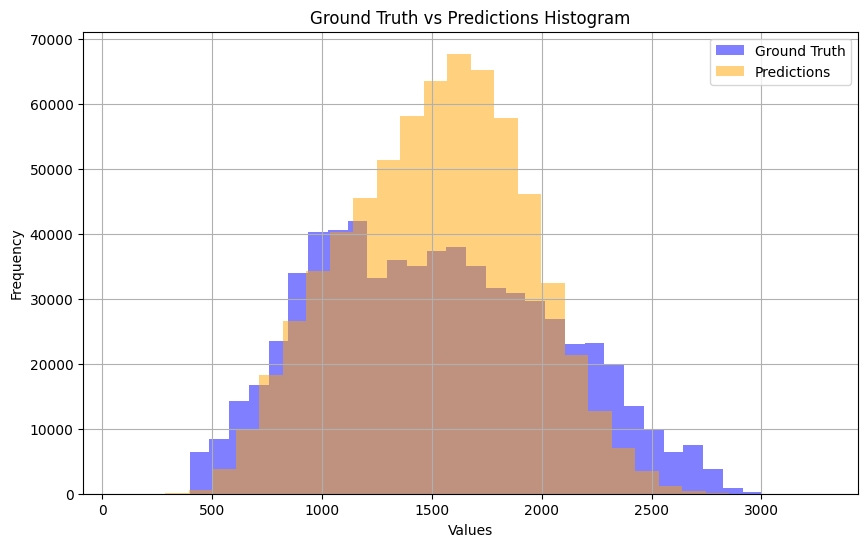

In [10]:
# Import neccessary files
from src.lib.models.nn_learner import ChessPuzzleRatingModel, NNLearner
from torch.utils.data import DataLoader, TensorDataset
from src.lib.train_helper import stratified_split
from src.lib.nn_dataset import ChessPuzzleDataset
import torch

df = pd.read_csv('../data/filtered/filtered_df.csv') 

X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(df)

X_test["Rating"] = y_test.values
test_dataset = ChessPuzzleDataset(X_test, add_empty_channel=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=True)

cnn_gru_model = ChessPuzzleRatingModel()
pretrained_path = "../results/models/cnn/cnn_best"
if os.path.exists(pretrained_path):
    print(f"Loading pretrained model from {pretrained_path}")
    cnn_gru_model.load_state_dict(torch.load(pretrained_path))
    print("Pretrained model loaded successfully.")

learner_nn = NNLearner(cnn_gru_model, dataset_class=ChessPuzzleDataset)
learner_nn._evaluate(test_loader)
learner_nn.plot_predictions_histogram()



### LightGBM Graph

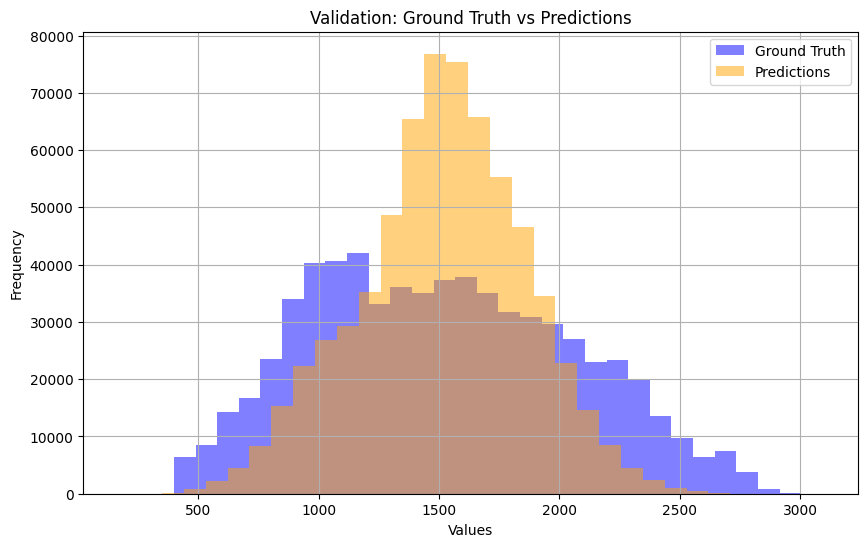

Validation MSE: 163668.5224


163668.52244619903

In [11]:
from src.lib.feature_generator import calculate_move_length
from src.lib.models.lgbm_learner import LightGBMLearner

df = pd.read_csv("../data/feature/graph_data.csv")

df['MoveLength'] = df['Moves'].apply(calculate_move_length)

drop_cols = ["Unnamed: 0", "Unnamed: 0.1", "index", "PuzzleId", "FEN", "Moves", "RatingDeviation", "Popularity", "NbPlays", "Themes", "GameUrl", "OpeningTags"]
df_final = df.drop(columns=drop_cols)

X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(df_final)

learner_lgbm = LightGBMLearner()
learner_lgbm.load_model("../results/models/lgbm/graph_best")

learner_lgbm.plot_validation_histogram(X_test, y_test)

learner_lgbm.evaluate(X_test, y_test)

### LightGBM Flatten

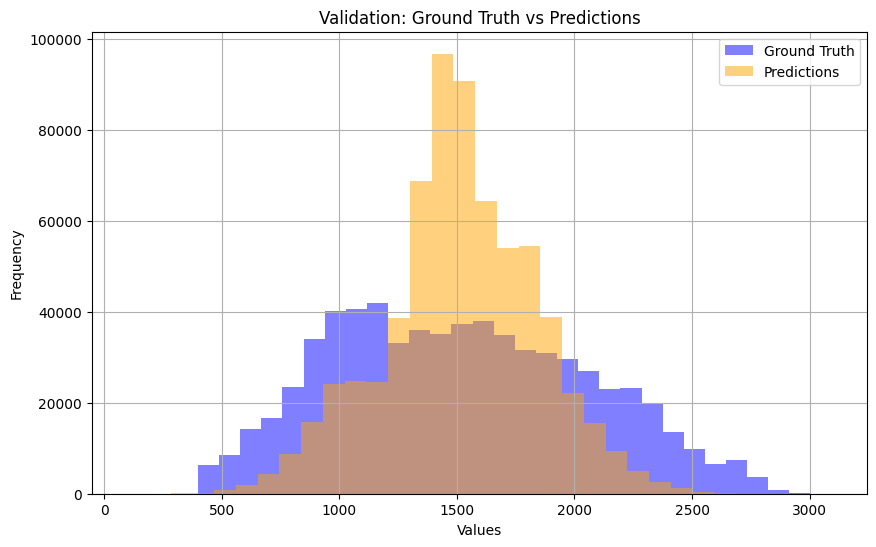

Validation MSE: 176159.9913


176159.991302153

In [16]:
from src.lib.fen_parser import flatten_board, parse_fen_without_board
from src.lib.move_encoder import encode_moves_64_squares
from src.lib.feature_generator import calculate_move_length

# df = pd.read_csv("../data/filtered/filtered_df.csv")

# tqdm.pandas()
# flattened = df['FEN'].apply(flatten_board)
# squares = [f"square_{i}" for i in range(1, 65)]
# flattened_df = pd.DataFrame(flattened.tolist(), columns=squares)
# df = pd.concat([df, flattened_df], axis=1)

# combined_features_df = df['FEN'].apply(parse_fen_without_board).apply(pd.Series)
# df = pd.concat([df, combined_features_df], axis=1)

# df['MoveLength'] = df['Moves'].apply(calculate_move_length)

# drop_cols = ["index", "PuzzleId", "FEN", "Moves", "RatingDeviation", "Popularity", "NbPlays", "Themes", "GameUrl", "OpeningTags"]
# df_final = df.drop(columns=drop_cols)

df_final = pd.read_csv("../data/demo/flatten.csv")

X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(df_final)

learner_lgbm = LightGBMLearner()
learner_lgbm.load_model("../results/models/lgbm/flattened_best")

learner_lgbm.plot_validation_histogram(X_test, y_test)

learner_lgbm.evaluate(X_test, y_test)

In [15]:
df_final.to_csv("../data/demo/flatten.csv", index=False)